<a href="https://colab.research.google.com/github/NilufarKhaydarova/ChurnPrediction/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score, precision_recall_curve
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ТЗ/churn.txt',  encoding="cp1251" ,sep=',', header=0, index_col = None)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Штат                          3333 non-null   object 
 1   Длина счета                   3333 non-null   int64  
 2   Код зоны                      3333 non-null   int64  
 3   Номер телефона                3333 non-null   object 
 4   Услуга международных звонков  3333 non-null   bool   
 5   Услуга VMail                  3333 non-null   bool   
 6   Количество VMail              3333 non-null   int64  
 7   Дневные минуты                3333 non-null   float64
 8   Дневные звонки                3333 non-null   int64  
 9   Дневная оплата                3333 non-null   float64
 10  Вечерние минуты               3333 non-null   float64
 11  Вечерние звонки               3333 non-null   int64  
 12  Вечерняя оплата               3333 non-null   float64
 13  Ноч

,Штат,Длина счета,Код зоны,Номер телефона,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<h1><b>Exploring data - Вводной анализ </h1>


In [ ]:
df.describe()



,Длина счета,Код зоны,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.isnull().sum()

Штат                            0
Длина счета                     0
Код зоны                        0
Номер телефона                  0
Услуга международных звонков    0
Услуга VMail                    0
Количество VMail                0
Дневные минуты                  0
Дневные звонки                  0
Дневная оплата                  0
Вечерние минуты                 0
Вечерние звонки                 0
Вечерняя оплата                 0
Ночные минуты                   0
Ночные звонки                   0
Ночная оплата                   0
Международные минуты            0
Международные звонки            0
Международная оплата            0
Обращений в СЦ                  0
Уход                            0
dtype: int64

In [ ]:
df.nunique()

Штат                              51
Длина счета                      212
Код зоны                           3
Номер телефона                  3333
Услуга международных звонков       2
Услуга VMail                       2
Количество VMail                  46
Дневные минуты                  1667
Дневные звонки                   119
Дневная оплата                  1667
Вечерние минуты                 1611
Вечерние звонки                  123
Вечерняя оплата                 1440
Ночные минуты                   1591
Ночные звонки                    120
Ночная оплата                    933
Международные минуты             162
Международные звонки              21
Международная оплата             162
Обращений в СЦ                    10
Уход                               2
dtype: int64

In [ ]:
#General correlation

df.corr(method='pearson').style.background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Длина счета,Код зоны,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
Длина счета,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Код зоны,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Услуга международных звонков,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Услуга VMail,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Количество VMail,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Дневные минуты,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Дневные звонки,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Дневная оплата,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Вечерние минуты,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Вечерние звонки,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


<h1><b> Factors related to customer churn</h1>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


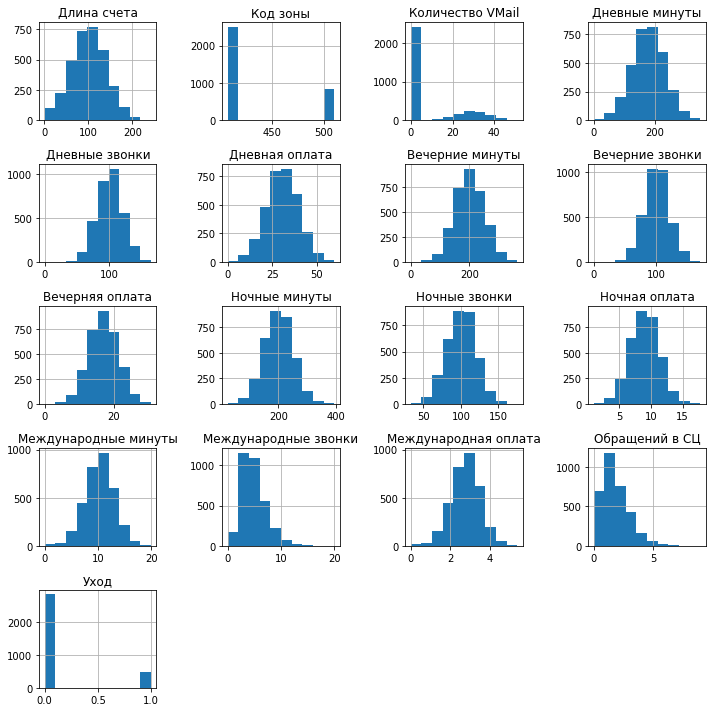

In [ ]:
# Distribution plot of frequency

#Turn Churn into numerical value
df['Уход'] = df['Уход'].replace({bool(True):1,bool(False):0})

#Plot
fig, ax = plt.subplots(figsize=(10,10))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout()
plt.show()

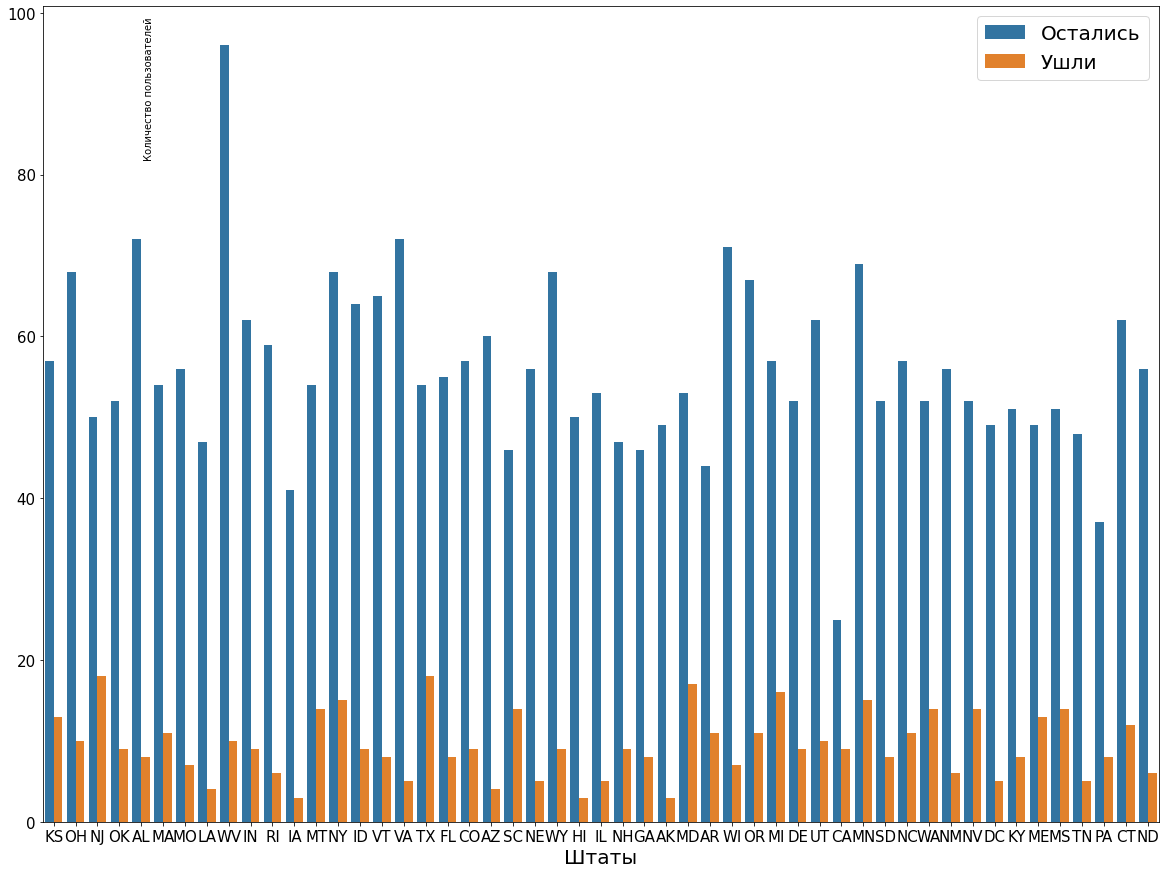

In [ ]:
# Does State affect the churn?
fig, ax = plt.subplots(figsize=(20,15))

ax = sns.countplot(x='Штат', hue='Уход', data=df)


ax.set_xlabel('Штаты', size=20)
ax.yaxis.set_label_coords(0.1, 0.9) 
ax.set_ylabel('Количество пользователей')
ax.legend(['Остались', 'Ушли'],loc=0,fontsize=20);

ax.tick_params(labelsize=15)



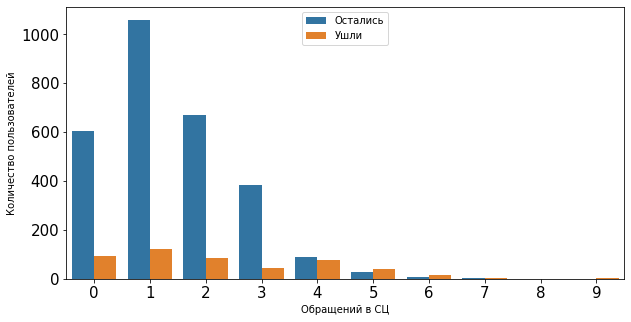

In [ ]:
#Calls to service center vs Churn

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x='Обращений в СЦ', hue='Уход', data=df)


ax.set_xlabel('Обращений в СЦ', size=10)
ax.set_ylabel('Количество пользователей', rotation=90)
ax.legend(['Остались', 'Ушли'],loc=0,fontsize=10);

ax.tick_params(labelsize=15)




In [ ]:
''' Dropping columns:
  Phone number (Номер телефона)= since each row is unique, no need to keep phone numbers
  Длина счета, Код зоны - very small correlation 
   '''

df = df.drop(['Номер телефона', 'Длина счета', 'Код зоны', 'Штат'], axis=1)

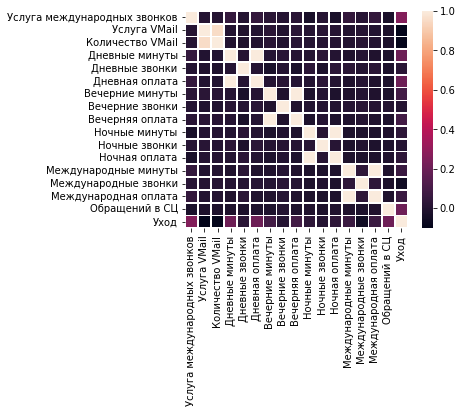

In [ ]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

Data Scaling and Normalization

In [ ]:
#Normalization
X = df.iloc[:,0:16].values
y = df.iloc[:,16].values


In [ ]:
X = df.iloc[:,0:16].values
y = df.iloc[:,16].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3 , random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((2333, 16), (2333,), (1000, 16), (1000,))

SMOTE

In [ ]:
#check first
import collections
collections.Counter(y_train)

Counter({0: 1988, 1: 345})

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



In [ ]:
#after SMOTE
collections.Counter(y_train_res)

Counter({0: 1988, 1: 1988})

<h1></b>Predictions</h1>


In [ ]:
tk=DecisionTreeClassifier(random_state=16)

In [ ]:
tk.fit(X_train, y_train)

DecisionTreeClassifier(random_state=16)

In [ ]:
pre_valid=tk.predict(X_test)
pre_valid.shape,y_test.shape

((1000,), (1000,))

In [ ]:
Kfold= StratifiedKFold(n_splits=5,shuffle=True,random_state=16)

In [ ]:
parameters = {'max_depth': np.arange(2,11),'min_samples_leaf': np.arange(1,11)}
ct_best = GridSearchCV(estimator=tk,param_grid=parameters,cv=Kfold,n_jobs=-1,verbose=1)

In [ ]:
ct_best.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=16), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=1)

In [ ]:
ct_best.best_params_

{'max_depth': 8, 'min_samples_leaf': 6}

In [ ]:
ct_best.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, random_state=16)

In [ ]:
ct_best.best_score_

0.9348494177978328

In [ ]:
pred_val=ct_best.predict(X_test)

In [ ]:
accuracy_score(pred_val,y_test)

0.945

In [ ]:
tk9=DecisionTreeClassifier(random_state=19,max_depth=3).fit(X_train,y_train)

In [ ]:
from ipywidgets import Image
from io import StringIO
import pydotplus 

dot2_data=StringIO()
export_graphviz(decision_tree=tk9,out_file=dot2_data,filled=True,feature_names=df.drop(['Уход'], axis=1).columns)
graph=pydotplus.graph_from_dot_data(dot2_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xc2\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xc1MX\x9…

Random Forest Classifier

In [ ]:

X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:16])

# Target
dfNorm['Уход'] = df['Уход']
dfNorm.head(5)


,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0
1,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0
2,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0
3,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0
4,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0


In [ ]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=16, verbose=0,
            warm_start=False)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=6, n_jobs=1,
                       random_state=16)

In [ ]:
y_pred = rfc.predict(X_test)

Text(0.5, 1.0, 'Random Forest Classifier')

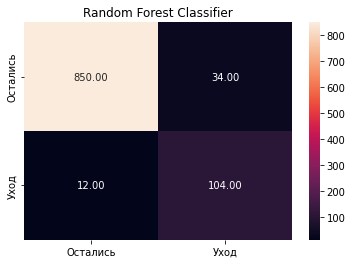

In [ ]:
forest_cm = confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Остались", "Уход"] , yticklabels = ["Остались", "Уход"] )
plt.title('Random Forest Classifier')

In [ ]:
acc_score = accuracy_score(y_test,y_pred)
rec_score = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred) 

In [ ]:
print('Accuracy:', acc_score)
print('Recall:', rec_score)
print('Precision:', precision)
print('ROC AUC score:', roc_auc)
print('F1 Score:', f1)

Accuracy: 0.954
Recall: 0.7536231884057971
Precision: 0.896551724137931
ROC AUC score: 0.869851037358351
F1 Score: 0.8188976377952756


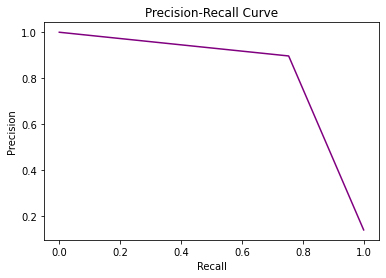

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
y_pred_full = rfc.predict(X)

Feature Selection

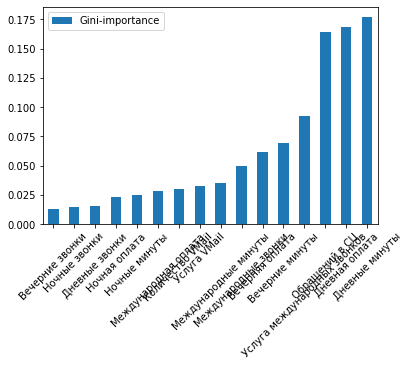

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

  

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [ ]:
importances

,Gini-importance
Услуга международных звонков,0.092776
Услуга VMail,0.032999
Количество VMail,0.030034
Дневные минуты,0.176838
Дневные звонки,0.015482
Дневная оплата,0.168438
Вечерние минуты,0.068886
Вечерние звонки,0.012785
Вечерняя оплата,0.061601
Ночные минуты,0.024623


Predict Probability of Churn with Logistic Regression

In [ ]:

churn_df = df[['Дневные минуты', 'Дневная оплата', 'Услуга международных звонков', 'Обращений в СЦ', 'Уход']]


In [ ]:
X=churn_df.iloc[:, 0:4]
y= churn_df.iloc[:,4]
y = y.values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)


In [ ]:
sm = SMOTE(random_state=0, k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [ ]:
lr= LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_prob = lr.predict(X_test)


In [ ]:
# print accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred_prob))

# print precision, recall, F1-score per each class/tag
print(classification_report(y_test, y_pred_prob))


Accuracy:  0.7526236881559221
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       593
           1       0.26      0.68      0.38        74

    accuracy                           0.75       667
   macro avg       0.61      0.72      0.61       667
weighted avg       0.87      0.75      0.79       667



In [ ]:
# print confusion matrix
print(confusion_matrix(y_test, y_pred_prob))

[[452 141]
 [ 24  50]]


In [ ]:
probs = pd.DataFrame(data=churn_df,columns=churn_df.columns)

In [ ]:
# Computing predicted probabilities
pred_probs = lr.predict_proba(X)
pred_probs.shape


(3333, 2)

In [ ]:
# Actual Churn
probs['Уход'] = y.copy()
# Predicted Churn
probs["Уход прогноз"] = y_pred_full
# Predicted Probability of No Churn
probs['Вероятность пребывания'] = pred_probs[:,0]
# Predicted Probability of Churn
probs['Вероятность ухода'] = pred_probs[:,1]

In [ ]:
probs.head(5)

,Дневные минуты,Дневная оплата,Услуга международных звонков,Обращений в СЦ,Уход,Уход прогноз,Вероятность пребывания,Вероятность ухода
0,265.1,45.07,False,1,0,0,0.462661,0.537339
1,161.6,27.47,False,1,0,0,0.806856,0.193144
2,243.4,41.38,False,0,0,0,0.676135,0.323865
3,299.4,50.90,True,2,0,0,0.016604,0.983396
4,166.7,28.34,True,3,0,0,0.068434,0.931566


In [ ]:
probs[probs['Уход'] == 1].tail(10)

,Дневные минуты,Дневная оплата,Услуга международных звонков,Обращений в СЦ,Уход,Уход прогноз,Вероятность пребывания,Вероятность ухода
3268,289.1,49.15,False,2,1,1,0.255320,0.744680
3272,295.0,50.15,False,2,1,1,0.238581,0.761419
3280,107.3,18.24,False,4,1,1,0.644417,0.355583
3287,199.5,33.92,False,4,1,1,0.307396,0.692604
3291,172.1,29.26,True,1,1,1,0.170194,0.829806
3301,280.0,47.60,False,0,1,1,0.544274,0.455726
3304,186.1,31.64,True,4,1,1,0.030425,0.969575
3320,140.0,23.80,True,4,1,1,0.059628,0.940372
3322,321.1,54.59,False,4,1,1,0.064895,0.935105
3323,118.4,20.13,False,5,1,1,0.467705,0.532295


In [ ]:
probs[probs['Уход'] == 1].sum()

Дневные минуты                  99939.500000
Дневная оплата                  16989.970000
Услуга международных звонков      137.000000
Обращений в СЦ                   1077.000000
Уход                              483.000000
Уход прогноз                      382.000000
Вероятность пребывания            179.644443
Вероятность ухода                 303.355557
dtype: float64